In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
import seaborn as sns

%matplotlib inline
plt.style.use('dark_background')

# display multiple output in single cell
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [82]:
train_df=pd.read_csv('train.csv')

In [83]:
train_df.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [84]:
train_df.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [85]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [86]:
train_df.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [87]:
train_df.shape

(3000, 23)

In [88]:
train_df = train_df.drop(['belongs_to_collection', 'genres', 'crew', 'cast', 'Keywords', 
                  'spoken_languages', 'production_companies', 'production_countries', 'tagline','overview','homepage'], axis=1)


In [89]:
train_df.shape

(3000, 12)

In [104]:
train_df['release_date'] = pd.to_datetime(train_df['release_date'], format='%Y-%m-%d')  # Example format

train_df['release_day'] = train_df['release_date'].apply(lambda t: t.day)
train_df['release_weekday'] = train_df['release_date'].apply(lambda t: t.weekday())
train_df['release_month'] = train_df['release_date'].apply(lambda t: t.month)

# Year was being interpreted as future dates in some cases so I had to adjust some values
train_df['release_year'] = train_df['release_date'].apply(lambda t: t.year if t.year < 2018 else t.year -100)

In [91]:
train_df[train_df['revenue'] == train_df['revenue'].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
1126,1127,220000000,tt0848228,en,The Avengers,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,2012-04-25,143.0,Released,The Avengers,1519557910,25,2,4,2012


In [92]:
train_df[train_df['revenue'] == train_df['revenue'].min()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
347,348,12,tt0118172,en,The Wind in the Willows,1.410322,/nsOM52BsDeHzc0yI27bah2OWems.jpg,1996-10-16,84.0,Released,The Wind in the Willows,1,16,2,10,1996
1754,1755,2,tt0110604,en,Mute Witness,2.466066,/1AJujK1IjuyxvIG8pjmef9qJsnQ.jpg,1995-09-28,95.0,Released,Mute Witness,1,28,3,9,1995
1874,1875,0,tt1133617,en,Vermist,0.229233,/kWbiNRAPLu5q065r0thIFdmQOBv.jpg,2007-01-01,0.0,Released,Missing,1,1,0,1,2007
1917,1918,592,tt0016104,en,The Merry Widow,0.286719,/dCVkB0POblxtn3BegTNcwTPMKUP.jpg,2025-08-26,137.0,Released,The Merry Widow,1,26,1,8,1925


In [93]:
train_df[train_df['popularity'] == train_df['popularity'].max()]


,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
518,519,149000000,tt0451279,en,Wonder Woman,294.337037,/imekS7f1OuHyUP2LAiTEM0zBzUz.jpg,2017-05-30,141.0,Released,Wonder Woman,820580447,30,1,5,2017


In [94]:
train_df[train_df['popularity'] == train_df['popularity'].min()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
2556,2557,0,tt0094743,en,Big Time,0.000001,/bhq6dvbwPbebHT6xd8g7gie7spe.jpg,1988-09-15,87.0,Released,Big Time,148426,15,3,9,1988


In [95]:
train_df[['id','title','budget','revenue']].sort_values(['revenue'], ascending=False).head(10).style.background_gradient(subset='revenue', cmap='BuGn')

,id,title,budget,revenue
1126,1127,The Avengers,220000000,1519557910
1761,1762,Furious 7,190000000,1506249360
2770,2771,Avengers: Age of Ultron,280000000,1405403694
684,685,Beauty and the Beast,160000000,1262886337
2322,2323,Transformers: Dark of the Moon,195000000,1123746996
906,907,The Dark Knight Rises,250000000,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2562,2563,Finding Dory,200000000,1028570889
881,882,Alice in Wonderland,200000000,1025491110
734,735,Zootopia,150000000,1023784195


In [96]:
train_df[train_df['budget'] == train_df['budget'].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
2135,2136,380000000,tt1298650,en,Pirates of the Caribbean: On Stranger Tides,27.88772,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,2011-05-14,136.0,Released,Pirates of the Caribbean: On Stranger Tides,1045713802,14,5,5,2011


In [97]:
train_df[['id','title','budget','revenue']].sort_values(['budget'],ascending=False).head(10).style.background_gradient(subset=['budget', 'revenue'], cmap='PuBu')

,id,title,budget,revenue
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2209,2210,Pirates of the Caribbean: At World's End,300000000,961000000
2770,2771,Avengers: Age of Ultron,280000000,1405403694
1425,1426,Superman Returns,270000000,391081192
1270,1271,John Carter,260000000,284139100
1630,1631,Transformers: The Last Knight,260000000,604942143
2532,2533,The Hobbit: An Unexpected Journey,250000000,1021103568
961,962,Harry Potter and the Half-Blood Prince,250000000,933959197
906,907,The Dark Knight Rises,250000000,1084939099
666,667,The Hobbit: The Desolation of Smaug,250000000,958400000


In [98]:
train_df[train_df['runtime'] == train_df['runtime'].max()]

,id,budget,imdb_id,original_language,original_title,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year
1211,1212,18000000,tt1321865,en,Carlos,4.558075,/obHJeOHn8J5XD049nj7KVSpAMEW.jpg,2010-05-19,338.0,Released,Carlos,871279,19,2,5,2010


(array([ 14.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   1.,   1.,   5.,
         16.,  44., 168., 370., 478., 414., 396., 277., 221., 194., 114.,
         96.,  42.,  28.,  37.,  25.,  18.,   8.,   9.,   8.,   3.,   2.,
          1.,   3.,   2.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.10242424, 0.20484848, 0.30727273, 0.40969697,
        0.51212121, 0.61454545, 0.7169697 , 0.81939394, 0.92181818,
        1.02424242, 1.12666667, 1.22909091, 1.33151515, 1.43393939,
        1.53636364, 1.63878788, 1.74121212, 1.84363636, 1.94606061,
        2.04848485, 2.15090909, 2.25333333, 2.35575758, 2.45818182,
        2.56060606, 2.6630303 , 2.76545455, 2.86787879, 2.97030303,
        3.07272727, 3.17515152, 3.27757576, 3.38      , 3.48242424,
        3.58484848, 3.68727273, 3.78969697, 3.89212121, 3.99454545,
        4.0969697 , 4.19939394, 4.30181818, 4.40424242, 4.50666667,
        4.609090

Text(0.5, 1.0, 'Duration of Movie')

Text(0.5, 0, 'Runtime (Hrs)')

Text(0, 0.5, 'Number of Movies')

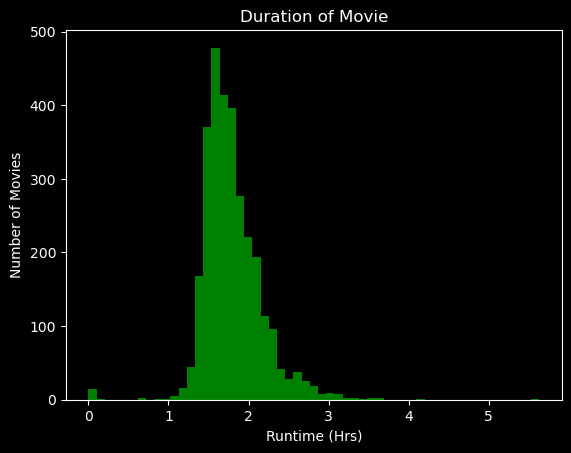

In [99]:
plt.hist(train_df['runtime'].fillna(0)/60, bins=55, color='green')
plt.title('Duration of Movie')
plt.xlabel('Runtime (Hrs)')
plt.ylabel('Number of Movies')

In [100]:
train_df[['id','title','runtime', 'budget', 'revenue']].sort_values(['runtime'],ascending=False).head(10).style.background_gradient(subset=['runtime','budget','revenue'], cmap='YlGn')

,id,title,runtime,budget,revenue
1211,1212,Carlos,338.000000,18000000,871279
1922,1923,Cleopatra,248.000000,31115000,71000000
523,524,The Ten Commandments,220.000000,13000000,122700000
1302,1303,Heaven's Gate,219.000000,44000000,3484331
1914,1915,Gods and Generals,214.000000,56000000,12923936
2353,2354,Jodhaa Akbar,213.000000,8376800,13000000
625,626,Ben-Hur,212.000000,15000000,146900000
1975,1976,Chapiteau-Show,207.000000,2000000,393816
1731,1732,Hey Ram,199.000000,3900000,4900000
2120,2121,Spartacus,197.000000,12000000,60000000


<Figure size 2000x1200 with 0 Axes>

<Axes: xlabel='release_year', ylabel='count'>

Text(0.5, 1.0, 'Movie Release Count by Year')

Text(0.5, 0, 'Release Year')

Text(0, 0.5, 'Number of Movies Released')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89]),
 [Text(0, 0, '1921'),
  Text(1, 0, '1924'),
  Text(2, 0, '1925'),
  Text(3, 0, '1926'),
  Text(4, 0, '1927'),
  Text(5, 0, '1928'),
  Text(6, 0, '1930'),
  Text(7, 0, '1931'),
  Text(8, 0, '1932'),
  Text(9, 0, '1933'),
  Text(10, 0, '1935'),
  Text(11, 0, '1936'),
  Text(12, 0, '1938'),
  Text(13, 0, '1939'),
  Text(14, 0, '1940'),
  Text(15, 0, '1942'),
  Text(16, 0, '1943'),
  Text(17, 0, '1944'),
  Text(18, 0, '1945'),
  Text(19, 0, '1947'),
  Text(20, 0, '1948'),
  Text(21, 0, '1949'),
  Text(22, 0, '1950'),
  Text(23, 0, '1951'),
  Text(24, 0, '1952'),
  Text(25, 0, '1953'),
  

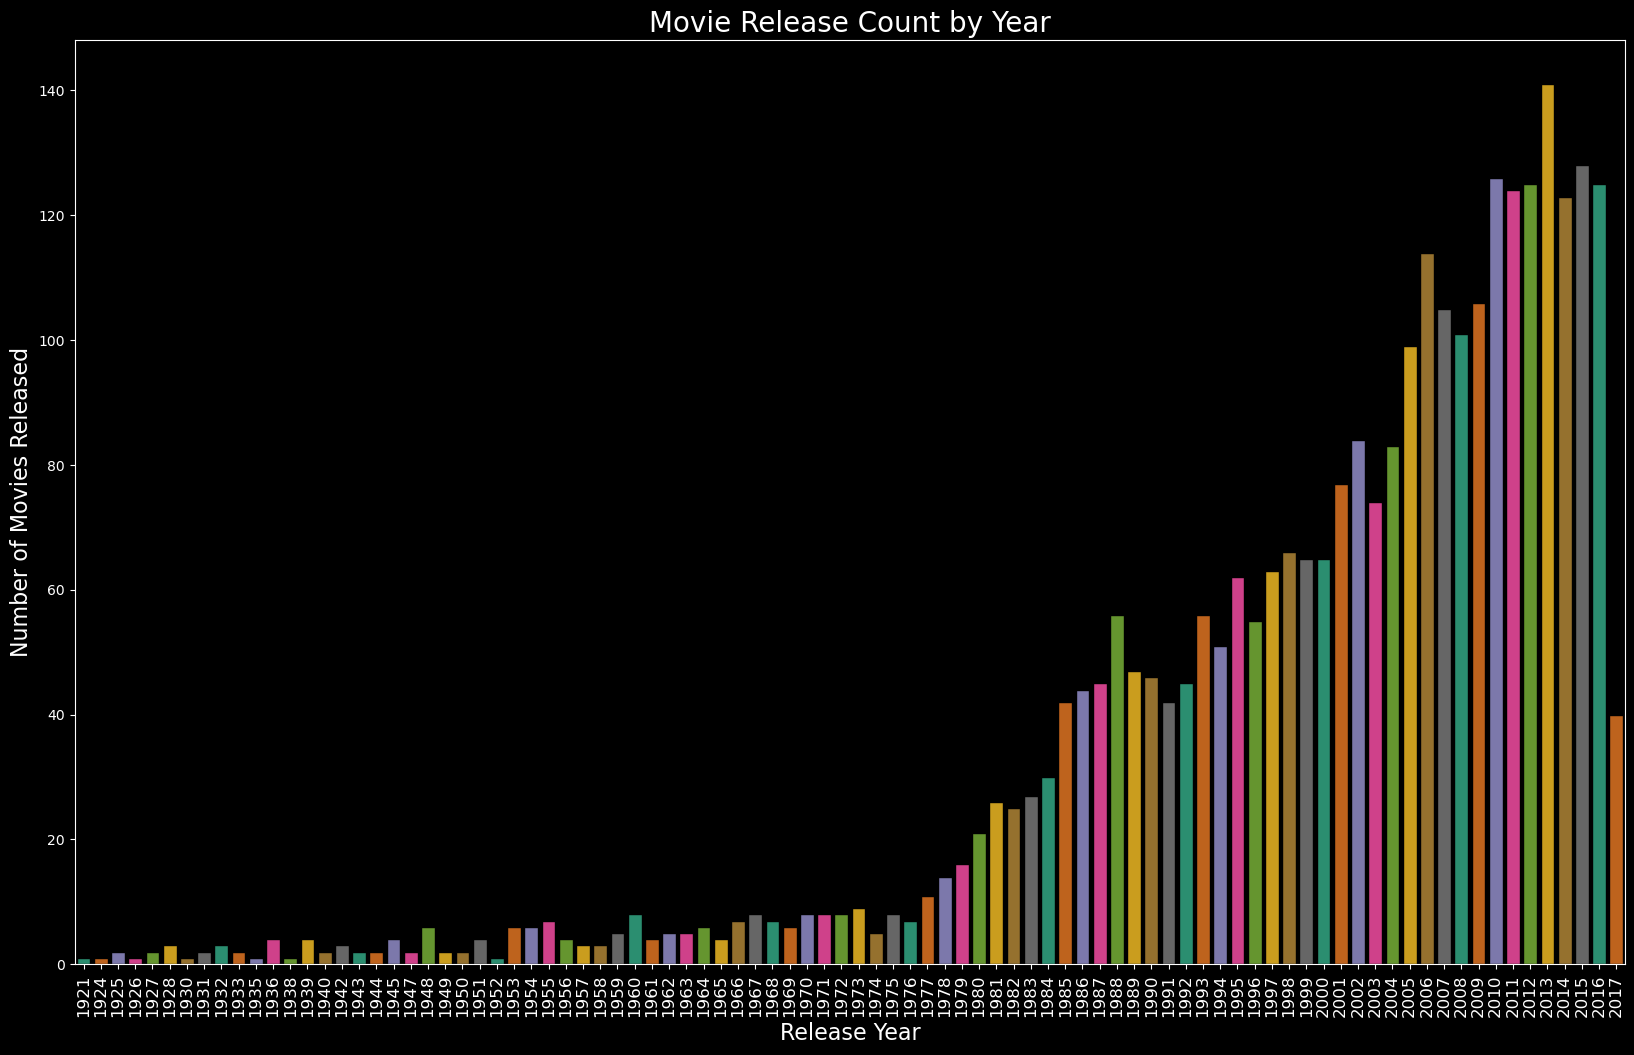

In [136]:
plt.figure(figsize=(20, 12))

# Ensure that 'release_year' is extracted correctly from 'release_date' if not already
# train_df['release_year'] = pd.to_datetime(train_df['release_date']).dt.year  # Uncomment if needed

# Plot the count of movies released by year
sns.countplot(x=train_df['release_year'], palette="Dark2", edgecolor=(0, 0, 0))

# Add title and labels
plt.title("Movie Release Count by Year", fontsize=20)
plt.xlabel('Release Year', fontsize=16)
plt.ylabel('Number of Movies Released', fontsize=16)

# Rotate x-ticks for better readability
plt.xticks(fontsize=12, rotation=90)

# Show the plot
plt.show()

In [106]:
train_df['release_year'].value_counts().head()

release_year
2013    141
2015    128
2010    126
2012    125
2016    125
Name: count, dtype: int64

In [108]:
train_df[train_df['popularity']==train_df['popularity'].max()][['original_title','popularity','release_date','revenue']]

,original_title,popularity,release_date,revenue
518,Wonder Woman,294.337037,2017-05-30,820580447


In [109]:
train_df[train_df['popularity']==train_df['popularity'].min()][['original_title','popularity','release_date','revenue']]

,original_title,popularity,release_date,revenue
2556,Big Time,0.000001,1988-09-15,148426


<Figure size 2000x1200 with 0 Axes>

C:\Users\param\AppData\Local\Temp\ipykernel_4336\2666608044.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['popularity'], kde=False)


<Axes: xlabel='popularity'>

Text(0.5, 1.0, 'Movie Popularity Count')

Text(0.5, 0, 'Popularity')

Text(0, 0.5, 'Count')

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(-50.0, 0, '−50'),
  Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

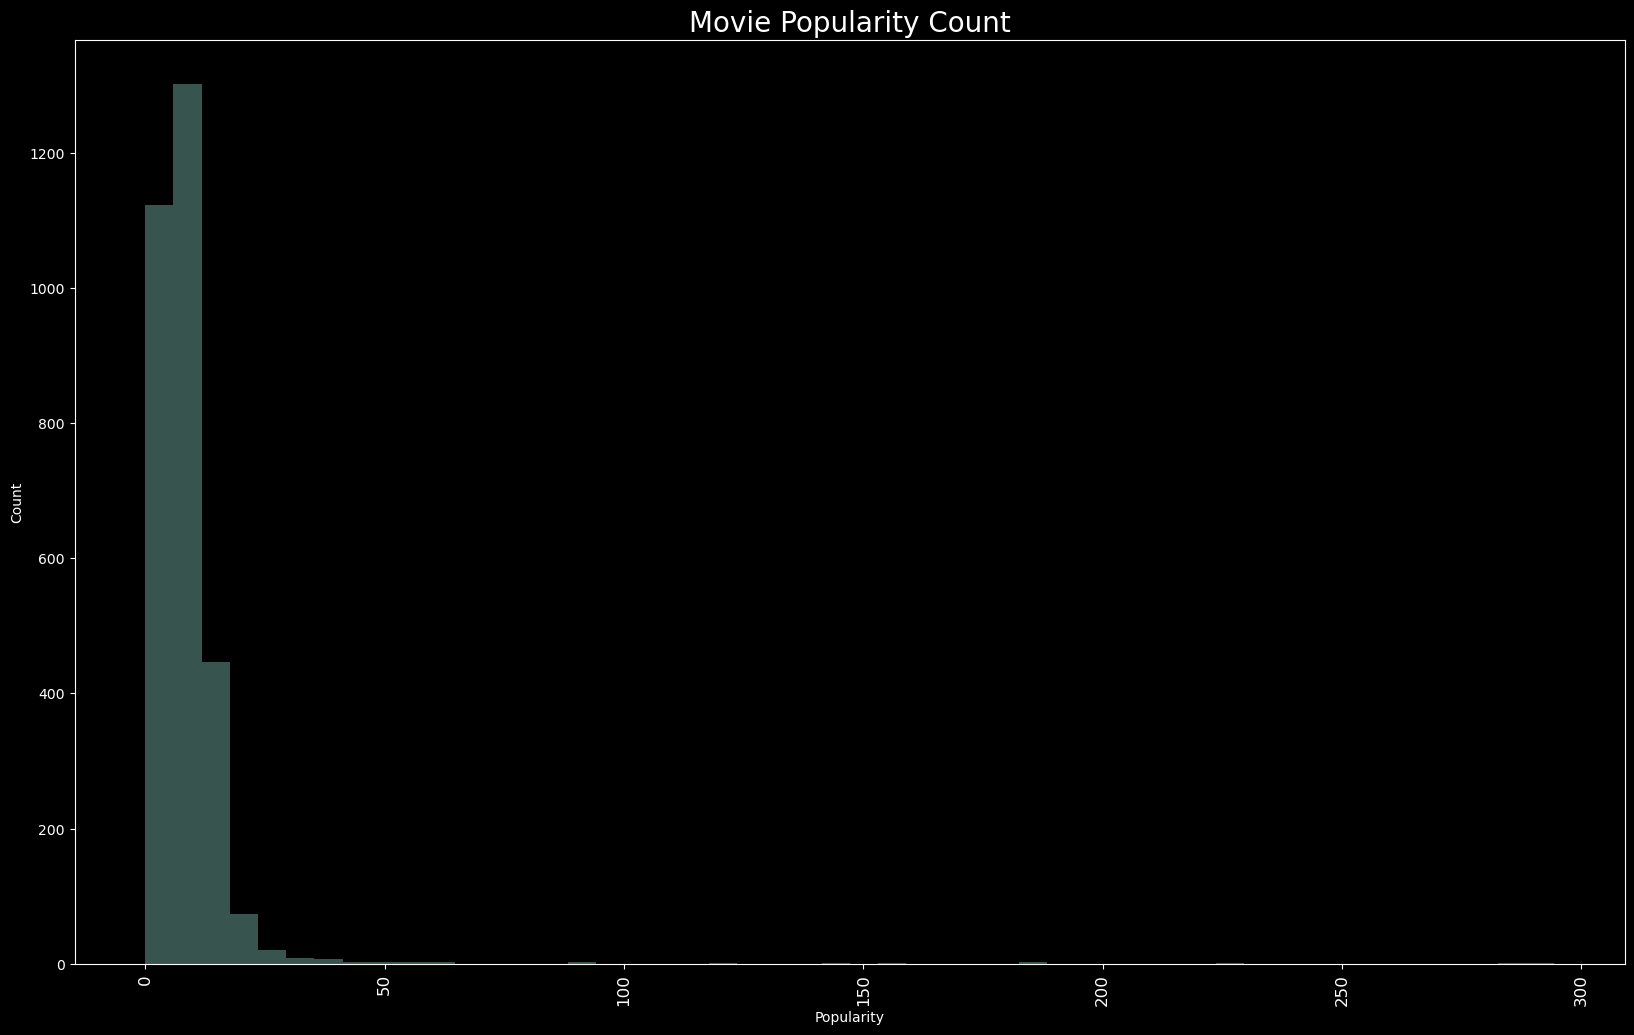

In [113]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0),
sns.distplot(train_df['popularity'], kde=False)
plt.title("Movie Popularity Count",fontsize=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)
plt.show()

###  In which month most movies are released from 1921 to 2017?

<Figure size 2000x1200 with 0 Axes>

<Axes: xlabel='release_month', ylabel='count'>

Text(0.5, 1.0, 'Movie Release Count by Month')

Text(0.5, 0, 'Release Month')

Text(0, 0.5, 'Number of Movies Released')

([<matplotlib.axis.XTick at 0x2afc7389610>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

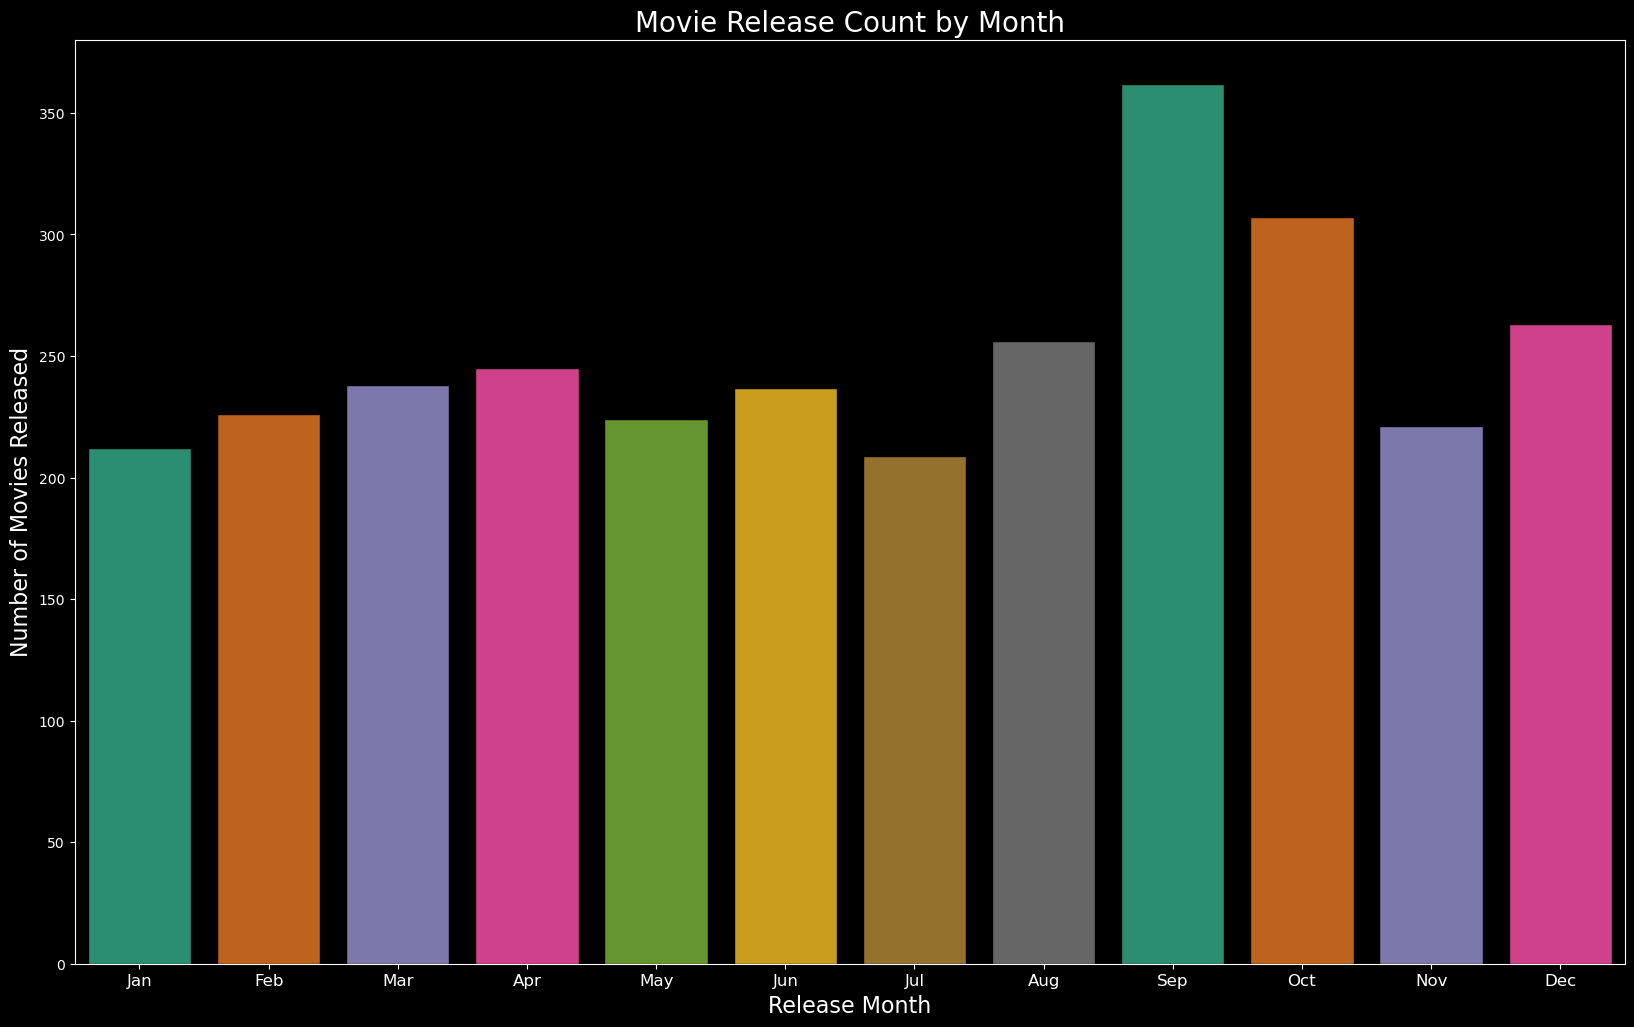

In [135]:
train_df['release_month'] = pd.to_datetime(train_df['release_date']).dt.month

# Set figure size
plt.figure(figsize=(20, 12))

# Plot the count of movies released each month
sns.countplot(x=train_df['release_month'], palette="Dark2", edgecolor=(0, 0, 0))

# Set plot title and labels
plt.title("Movie Release Count by Month", fontsize=20)
plt.xlabel('Release Month', fontsize=16)
plt.ylabel('Number of Movies Released', fontsize=16)

# Customize x-ticks
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)

# Display the plot
plt.show()

In [115]:
train_df['release_month'].value_counts()

release_month
9     362
10    307
12    263
8     256
4     245
3     238
6     237
2     226
5     224
11    221
1     212
7     209
Name: count, dtype: int64

### On which date of month most movies are released?

<Figure size 2000x1200 with 0 Axes>

<Axes: xlabel='release_day', ylabel='count'>

Text(0.5, 1.0, 'Movie Release Count by Day of Month')

Text(0.5, 0, 'Release Day')

Text(0, 0.5, 'Number of Movies Released')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

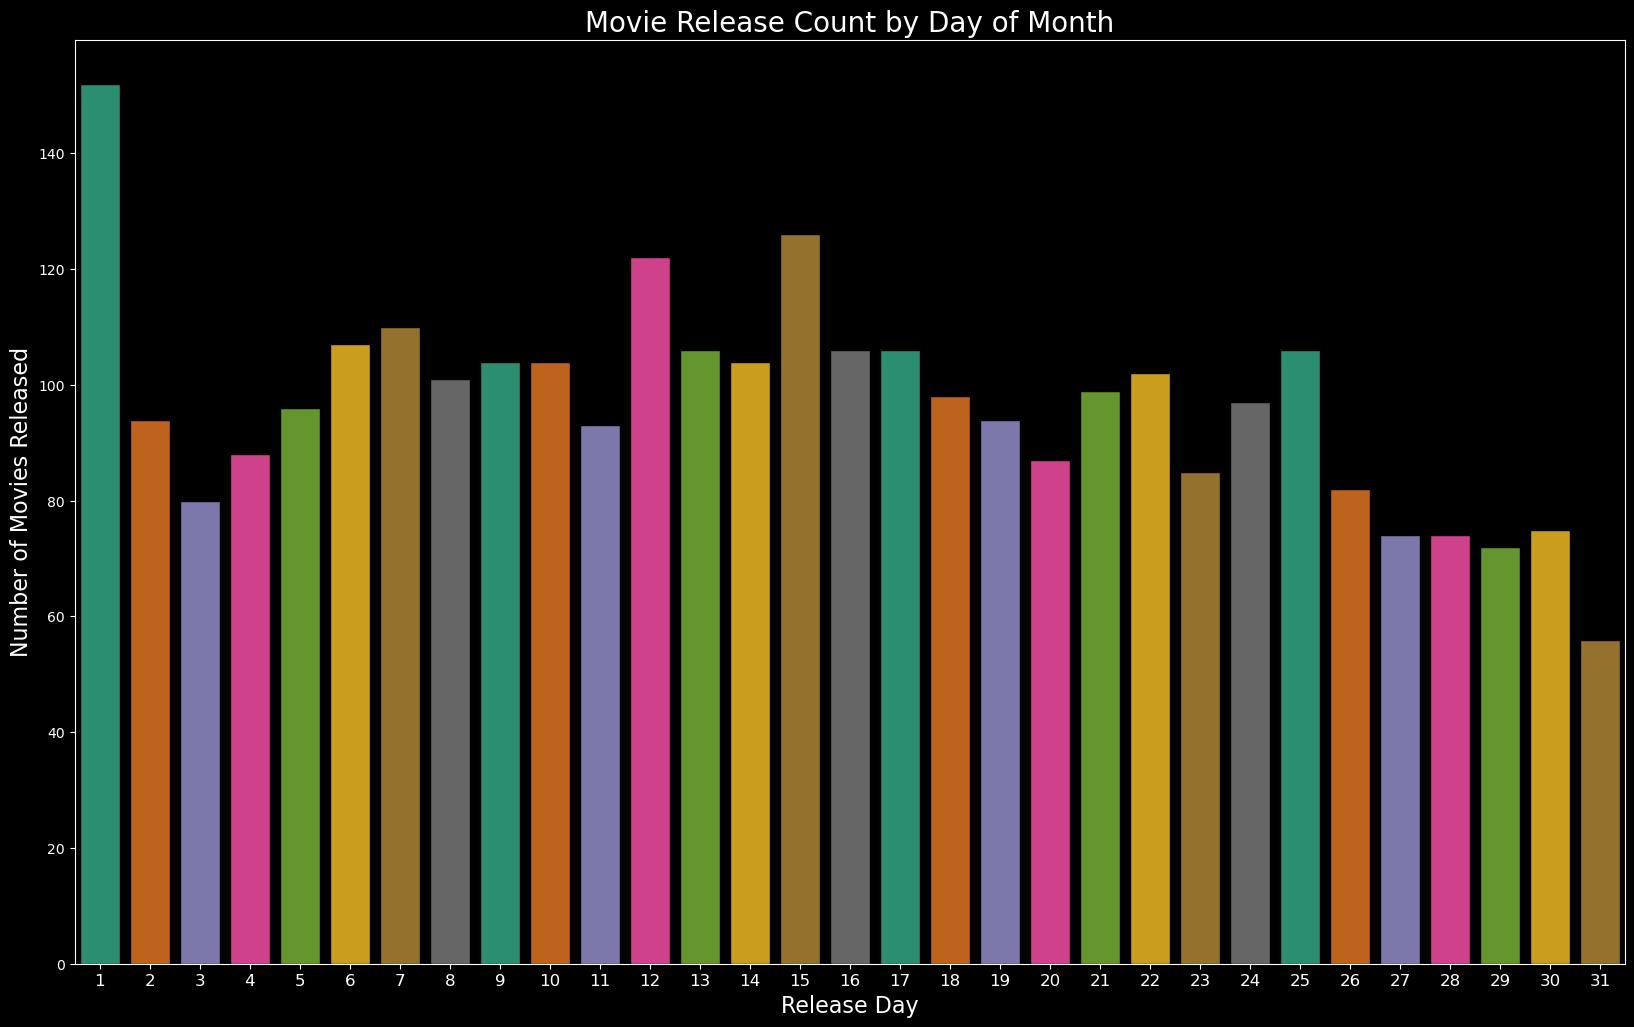

In [134]:
plt.figure(figsize=(20, 12))

# Ensure that 'release_day' contains valid day values (1 to 31)
# Plot the count of movies released on each day of the month
sns.countplot(x=train_df['release_day'], palette='Dark2', edgecolor=(0, 0, 0))

# Add title and labels
plt.title("Movie Release Count by Day of Month", fontsize=20)
plt.xlabel('Release Day', fontsize=16)
plt.ylabel('Number of Movies Released', fontsize=16)

# Set the x-ticks and adjust the font size
plt.xticks(fontsize=12)

# Show the plot
plt.show()

In [119]:
train_df['release_day'].value_counts()

release_day
1     152
15    126
12    122
7     110
6     107
16    106
25    106
13    106
17    106
9     104
10    104
14    104
22    102
8     101
21     99
18     98
24     97
5      96
2      94
19     94
11     93
4      88
20     87
23     85
26     82
3      80
30     75
28     74
27     74
29     72
31     56
Name: count, dtype: int64

### On which day of week most movies are released?

<Figure size 2000x1200 with 0 Axes>

<Axes: xlabel='release_weekday', ylabel='count'>

([<matplotlib.axis.XTick at 0x2afc71fe0d0>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

Text(0.5, 0, 'Release Day of Week')

Text(0, 0.5, 'Number of Movies Released')

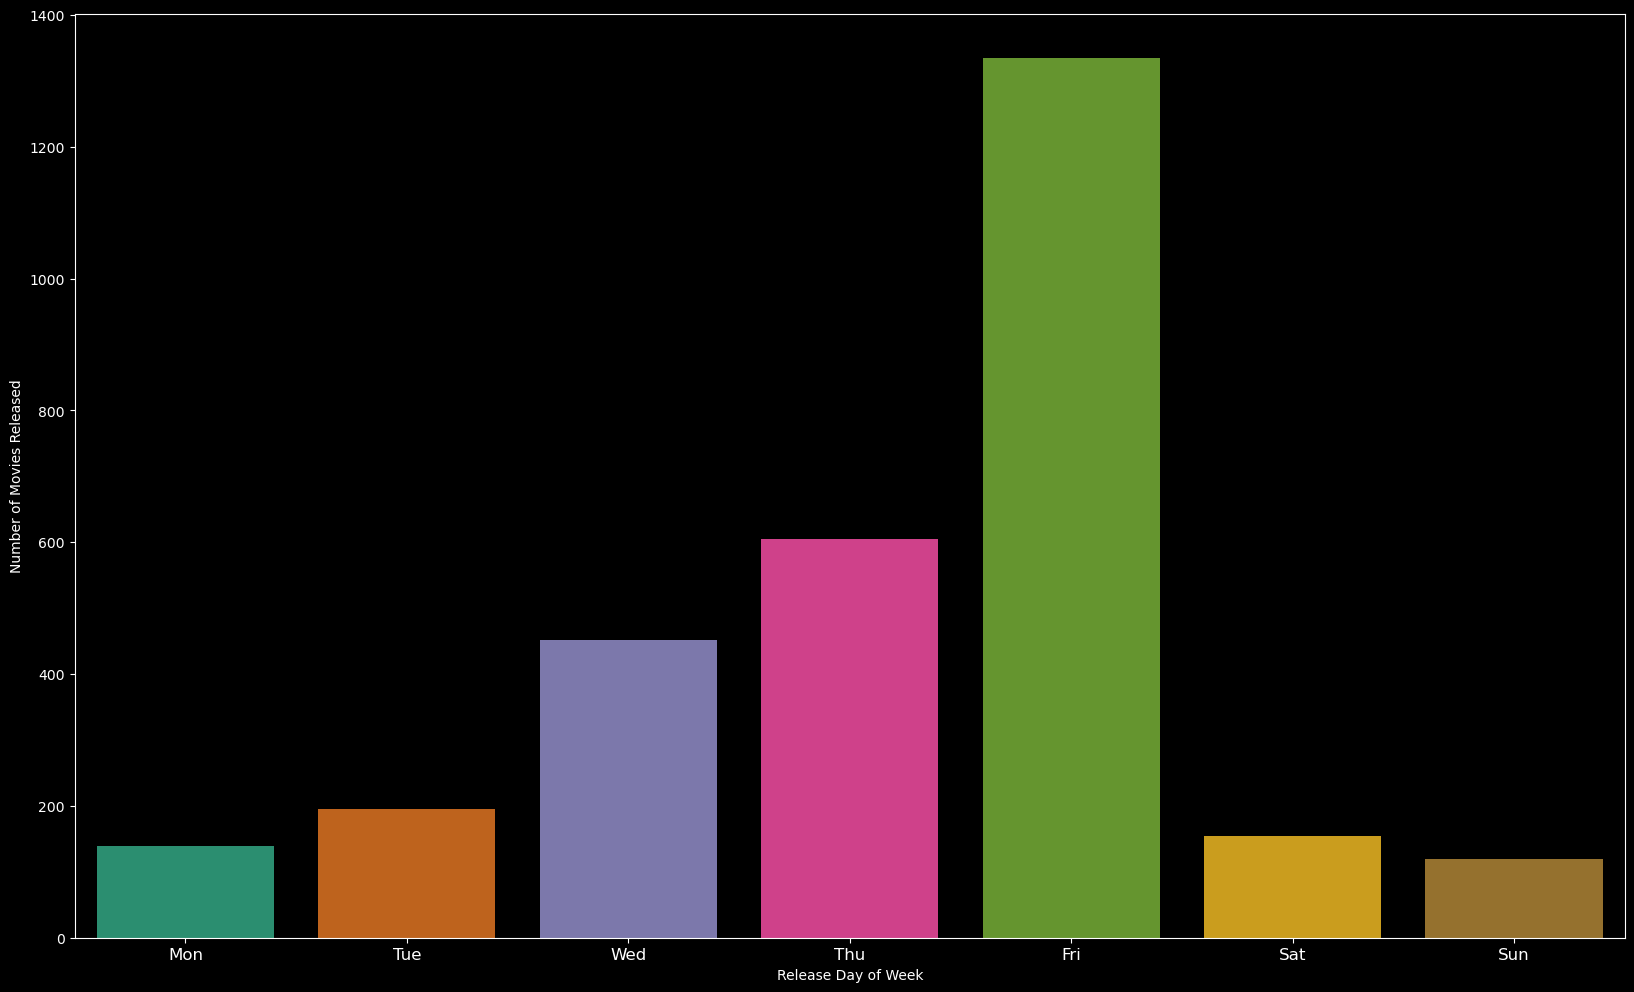

In [133]:

# Ensure that 'release_weekday' contains valid values (0 for Monday to 6 for Sunday)
train_df['release_weekday'] = pd.to_datetime(train_df['release_date']).dt.dayofweek

# Set figure size
plt.figure(figsize=(20, 12))

# Plot the count of movies released on each day of the week
sns.countplot(x=train_df['release_weekday'], palette='Dark2')

# Set the labels for days of the week
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Set the x-ticks and labels
plt.xticks(np.arange(7), day_labels, fontsize=12)

# Set axis labels
plt.xlabel('Release Day of Week')
plt.ylabel('Number of Movies Released')

# Display the plot
plt.show()

In [126]:
train_df['release_weekday'].value_counts()

release_weekday
4    1335
3     605
2     451
1     196
5     155
0     139
6     119
Name: count, dtype: int64

C:\Users\param\AppData\Local\Temp\ipykernel_12076\2183445882.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['release_date'] = pd.to_datetime(train_df['release_date'], errors='coerce')


Cleaned Data:
   id    budget    imdb_id original_language  \
0   1  14000000  tt2637294                en   
1   2  40000000  tt0368933                en   
2   3   3300000  tt2582802                en   
3   4   1200000  tt1821480                hi   
4   5         0  tt1380152                ko   

                             original_title  popularity  \
0                    Hot Tub Time Machine 2    6.575393   
1  The Princess Diaries 2: Royal Engagement    8.248895   
2                                  Whiplash   64.299990   
3                                   Kahaani    3.174936   
4                                      마린보이    1.148070   

                        poster_path release_date  runtime    status  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   2015-02-20     93.0  Released   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   2004-08-06    113.0  Released   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   2014-10-10    105.0  Released   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   2012-03-09    122.0 

Enter the budget of the movie:  42000000
Enter the runtime (in minutes):  156
Enter the release day (1-31):  15
Enter the release day of the week (0 for Monday, 6 for Sunday):  4
Enter the release month (1-12):  08
Enter the release year:  2024
Enter the movie's popularity score:  250



The predicted box office revenue is: $282,685,390.27


C:\Users\param\AppData\Local\Temp\ipykernel_12076\2183445882.py:81: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['budget'], kde=False, bins=50)


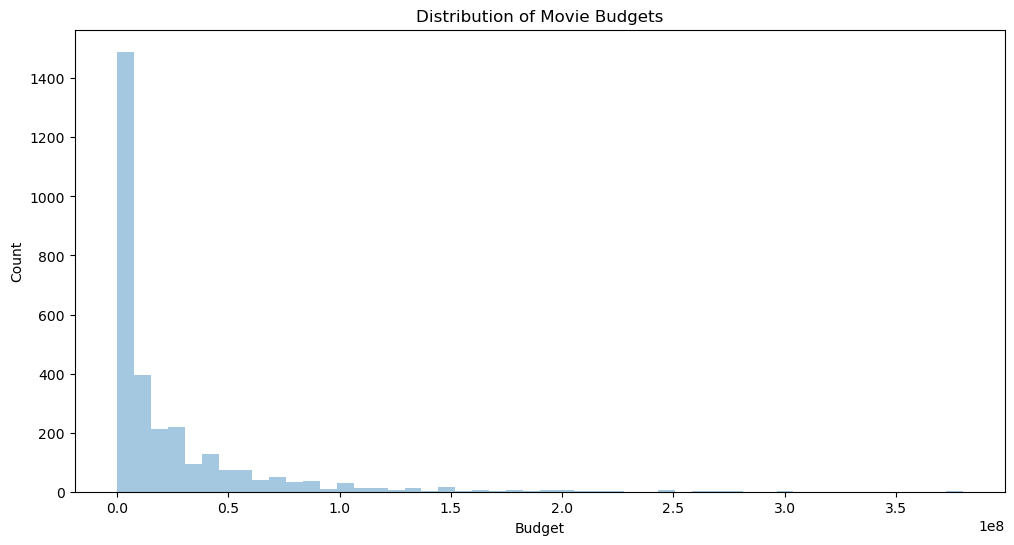

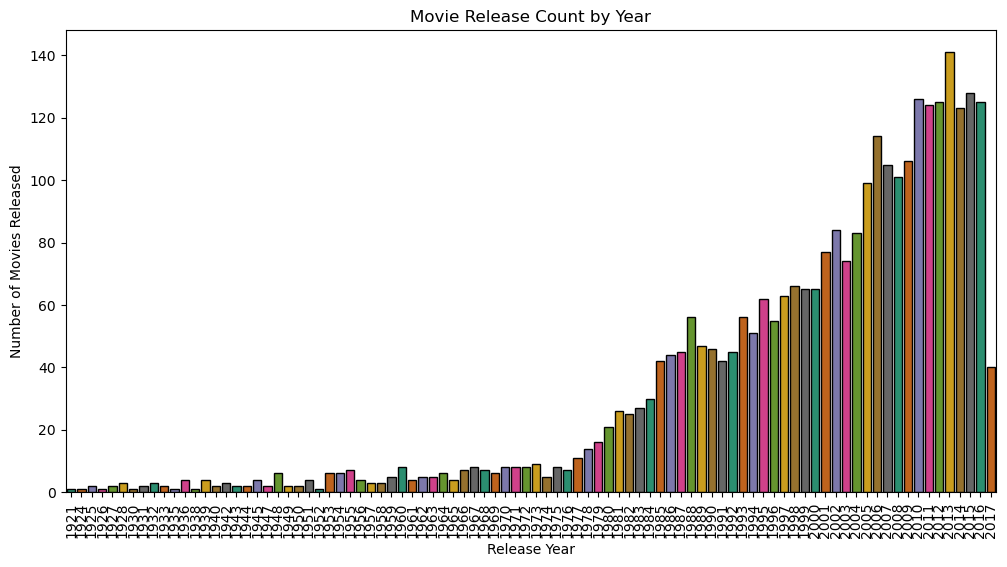

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
train_df = pd.read_csv('train.csv')

# Drop irrelevant columns
train_df = train_df.drop(['belongs_to_collection', 'genres', 'crew', 'cast', 'Keywords', 
                          'spoken_languages', 'production_companies', 'production_countries', 
                          'tagline', 'overview', 'homepage'], axis=1)

# Convert release_date to datetime and extract features
train_df['release_date'] = pd.to_datetime(train_df['release_date'], errors='coerce')

train_df['release_day'] = train_df['release_date'].dt.day
train_df['release_weekday'] = train_df['release_date'].dt.weekday
train_df['release_month'] = train_df['release_date'].dt.month
train_df['release_year'] = train_df['release_date'].dt.year
train_df['release_year'] = train_df['release_year'].apply(lambda x: x if x < 2018 else x - 100)

# Fill missing values with median
train_df['budget'].fillna(train_df['budget'].median(), inplace=True)
train_df['runtime'].fillna(train_df['runtime'].median(), inplace=True)

# Drop rows with missing revenue as it's the target variable
train_df = train_df.dropna(subset=['revenue'])

# Display the cleaned data
print("Cleaned Data:")
print(train_df.head())

# Define features and target variable
features = ['budget', 'runtime', 'release_day', 'release_weekday', 'release_month', 'release_year', 'popularity']
X = train_df[features]
y = train_df['revenue']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Function to predict revenue based on user input
def predict_revenue():
    print("\n--- Predict Box Office Revenue ---")
    # Collect user input
    budget = float(input("Enter the budget of the movie: "))
    runtime = float(input("Enter the runtime (in minutes): "))
    release_day = int(input("Enter the release day (1-31): "))
    release_weekday = int(input("Enter the release day of the week (0 for Monday, 6 for Sunday): "))
    release_month = int(input("Enter the release month (1-12): "))
    release_year = int(input("Enter the release year: "))
    popularity = float(input("Enter the movie's popularity score: "))

    # Prepare the input data for the model
    user_data = pd.DataFrame([[budget, runtime, release_day, release_weekday, release_month, release_year, popularity]],
                             columns=features)

    # Predict revenue
    predicted_revenue = model.predict(user_data)
    print(f"\nThe predicted box office revenue is: ${predicted_revenue[0]:,.2f}")

# Call the function to predict revenue based on user input
predict_revenue()

# Visualizations (optional)
plt.figure(figsize=(12, 6))
sns.distplot(train_df['budget'], kde=False, bins=50)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='release_year', data=train_df, palette="Dark2", edgecolor=(0, 0, 0))
plt.title('Movie Release Count by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.xticks(rotation=90)
plt.show()
